In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
df

,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,...,Music_karaoke,Music_live,Music_no_music,Music_video,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,Smoking,review_count_greater_median,cuisine_Chinese
EDqCEAGXVGCH4FJXgqtjqg,"[Restaurants, Pizza, Chicken Wings, Italian]",Toronto,"[Monday 11:0-2:0, Tuesday 11:0-2:0, Wednesday ...",1,43.661054,-79.429089,Pizza Pizza,Dufferin Grove,M6H 1L5,7,...,NaN,NaN,False,False,False,False,False,False,False,1
GDnbt3isfhd57T1QqU6flg,"[Tex-Mex, Mexican, Fast Food, Restaurants]",Scottsdale,"[Monday 10:0-22:0, Tuesday 10:0-22:0, Wednesda...",1,33.586710,-111.835410,Taco Bell,,85259,9,...,NaN,NaN,False,False,False,False,False,False,False,1
a1Ba6XeIOP48e64YFD0dMw,"[Sandwiches, Breakfast & Brunch, Salad, Restau...",Montréal,"[Monday 6:30-17:0, Tuesday 6:30-17:0, Wednesda...",1,45.502346,-73.573807,La Prep,Ville-Marie,H3A 2Z6,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0
826djy6K_9Fp0ptqJ2_Yag,"[Fast Food, Mexican, Restaurants]",Toronto,"[Monday 10:45-22:0, Tuesday 10:45-22:0, Wednes...",1,43.644920,-79.383333,Chipotle Mexican Grill,Downtown Core,M5J 2M2,68,...,NaN,NaN,False,True,True,False,False,True,True,1
Mi5uhdFB9OJteXPd0_IKfw,"[Restaurants, Italian, Seafood]",Glendale,"[Monday 16:0-22:0, Tuesday 16:0-22:0, Wednesda...",1,33.639301,-112.180893,Carrabba's Italian Grill,,85308,119,...,NaN,NaN,True,False,True,False,False,True,True,1
Uxh0fXFH_QQBivRnIBpdiw,"[Restaurants, Mexican, American (Traditional)]",Amherst,"[Monday 11:0-22:0, Tuesday 11:0-22:0, Wednesda...",1,41.416152,-82.207603,Don Tequila,,44001,22,...,NaN,NaN,True,False,True,False,False,True,False,1
YPavuOh2XsnRbLfl0DH2lQ,"[Restaurants, Waffles, Southern, Soul Food]",Phoenix,"[Monday 9:0-22:0, Tuesday 9:0-22:0, Wednesday ...",1,33.435372,-112.073970,Lo-Lo's Chicken & Waffles,,85003,1276,...,NaN,NaN,True,False,True,False,True,True,True,1
hovoWva_UjbnyLWEbnFvBw,"[Thai, Restaurants]",Stow,"[Monday 11:0-21:30, Tuesday 11:0-21:30, Wednes...",1,41.165709,-81.441370,Thai Gourmet,,44224,68,...,NaN,NaN,True,False,True,False,False,True,True,1
L_thK7r3K_h5M4tV7amEKQ,"[Diners, Italian, Sandwiches, Breakfast & Brun...",Toronto,"[Monday 0:0-0:0, Tuesday 0:0-0:0, Wednesday 0:...",1,43.822982,-79.247915,Honey B Hives Restaurant,Scarborough,M1V 4C3,118,...,NaN,NaN,True,False,False,False,False,True,True,1
hEcn9k6ONd5n2mq0lB2aew,"[American (Traditional), Restaurants]",Phoenix,"[Monday 6:0-22:0, Tuesday 6:0-22:0, Wednesday ...",1,33.552767,-112.135969,JB's Restaurant,,85051,24,...,NaN,NaN,False,False,True,False,False,True,False,1


In [3]:
df = pd.read_pickle('df_1518.pkl')

In [4]:
spatial_label = pd.read_pickle('../data_processeing/spatial_labels.pkl')

In [5]:
df_new = pd.concat([df,spatial_label], axis=1)

In [6]:
df_select = df_new[(df_new['stars'] >= 4) & (df_new['spatial_label'] == 3) & (df_new['cuisine_Chinese'] == 2)]

# Spectual Clustering

In [12]:
X = df_select.loc[:, 'AgesAllowed': 'review_count_greater_median']
X = pd.concat([X, df_select[['stars']]], axis=1)
X['stars'] = X['stars'].apply(str)
X = pd.get_dummies(X, dummy_na=False, drop_first=True)
def true_false(x):
    if x == True:
        return 1
    else:
        return 0
X['review_count_greater_median'] = X['review_count_greater_median'].apply(true_false)

In [32]:
for n_clusters in range(2,5):  
    spectural_clustering = SpectralClustering(n_clusters=n_clusters, random_state=100, affinity='sigmoid').fit(X)
    labels = spectural_clustering.labels_
    print silhouette_score(X, labels, metric='cityblock')
    print list(labels).count(0)
    print list(labels).count(1)
    print list(labels).count(2)
    print list(labels).count(3)
    print list(labels).count(4)

0.217059188173
223
12
0
0
0
0.118840713371
163
66
6
0
0
0.0865960643722
141
69
11
14
0


In [33]:
spectural_clustering = SpectralClustering(n_clusters=2, random_state=999, affinity='sigmoid').fit(X)
labels_spectural = spectural_clustering.labels_

In [34]:
df_select.shape

(235, 67)

# KMeans

In [35]:
## Dictionary to store anomaly results
dic_anomaly = {}

In [36]:
## function that gets silhouette scores for a clustering method
def get_silhouette_score(X, cluster_method, method='complete'):
    
    #Choose a range(list) of clusters I would like to try:
    range_n_clusters = range(2,10)
    
    if cluster_method == 'kmeans':
        for n_clusters in range_n_clusters: 
            km_result = KMeans(n_clusters=n_clusters, random_state=22).fit(X) # fit model
            cluster_labels = km_result.labels_

            # clustering model & clustering result to variable "cluster_labels". 
            silhouette_avg = silhouette_score(X, cluster_labels, random_state=22)
            print("For n_clusters ={},".format(n_clusters)+"{} - average silhouette_score :{}".\
                  format(cluster_method, silhouette_avg))

        
    elif cluster_method == 'gaussian_mix':
        for n_clusters in range_n_clusters: 
            gm = GaussianMixture(n_components=n_clusters, random_state=22).fit(X) # fit model
            cluster_labels = gm.predict(X)

            # clustering model & clustering result to variable "cluster_labels". 
            silhouette_avg = silhouette_score(X, cluster_labels, random_state=22)
            print("For n_clusters ={},".format(n_clusters)+"{} - average silhouette_score :{}".\
                  format(cluster_method, silhouette_avg))
        
        # res_mix_cluster.predict(X)
        
    elif cluster_method == 'hierarchical':
        # Define Z
        Z = linkage(X, method)

        for n_clusters in range_n_clusters:   
            cluster_labels=  fcluster(Z, n_clusters, criterion='maxclust') 

            silhouette_avg = silhouette_score(X, cluster_labels, random_state=22)
            print("For n_clusters ={},".format(n_clusters)+"{} - average silhouette_score :{}".\
                  format(cluster_method, silhouette_avg))

In [37]:
## choose the number of clusters using silhouette method
get_silhouette_score(X, 'kmeans')

For n_clusters =2,kmeans - average silhouette_score :0.14333626835
For n_clusters =3,kmeans - average silhouette_score :0.124606938754
For n_clusters =4,kmeans - average silhouette_score :0.106677619927
For n_clusters =5,kmeans - average silhouette_score :0.120790156938
For n_clusters =6,kmeans - average silhouette_score :0.106533678219
For n_clusters =7,kmeans - average silhouette_score :0.108980657389
For n_clusters =8,kmeans - average silhouette_score :0.101234949656
For n_clusters =9,kmeans - average silhouette_score :0.0756416849073


In [43]:
n_clusters = 2  # number of clusters
#XX= X.ix[:, ] # hour of day data

#train the model.
km=KMeans(n_clusters=n_clusters, random_state=22).fit(X)
labels_km = km.labels_

print list(labels_km).count(0)
print list(labels_km).count(1)

116
119


In [45]:
## Distance 
# KM=KMeans(n_clusters=k,random_state=9)
scor=km.fit_predict(X)

res_p=pd.DataFrame(km.transform(X))  ## distances of each data point to each cluster center!!!
res_p=pd.concat((res_p, pd.DataFrame(km.fit_predict(X))),axis=1)

res_p.columns=list(range(n_clusters))+["cluster"]
res_p.loc[:,"score"]=res_p.apply(lambda x: x[int(x["cluster"])],axis=1)
res_p.sort_values("score",ascending=False)[:5]

,0,1,cluster,score
223,3.220044,3.131738,1,3.131738
120,3.374304,2.942197,1,2.942197
188,2.919564,3.001577,0,2.919564
129,2.805117,3.019720,0,2.805117
209,2.808189,2.782185,1,2.782185


In [52]:
X_df = X.copy()

In [53]:
X_df['km'] = labels_km

In [54]:
X_df['distance_KM'] = res_p.score.values

In [55]:
## Get Anomalies
def get_anomaly(df, label_col, dist_or_likelihood, thres):
    
    df_anomalies = pd.DataFrame(columns=df.columns)
    
    clustermean = df.groupby(label_col)[dist_or_likelihood].mean()
    clusterstd = df.groupby(label_col)[dist_or_likelihood].std()
    
    for label in df[label_col].unique():
        anomaly = df[(df[label_col]==label) \
               & (abs(df[dist_or_likelihood] - clustermean[label]) / clusterstd[label] > thres)]
        
        df_anomalies = pd.concat([df_anomalies, anomaly], axis=0)
    
    return df_anomalies

In [59]:
## get anomalies based on kmeans distance
km_anomalies = get_anomaly(X_df, 'km', 'distance_KM', 2)

In [60]:
km_anomalies['distance_KM']

,review_count_greater_median,AgesAllowed_True,Ambience_classy_full_bar,Ambience_classy_none,Ambience_divey_True,Ambience_hipster_loud,Ambience_hipster_quiet,Ambience_hipster_very_loud,Ambience_romantic_dressy,Ambience_romantic_formal,...,Music_no_music_True,Music_video_True,OutdoorSeating_True,RestaurantsDelivery_True,RestaurantsGoodForGroups_True,Smoking_True,stars_4.5,stars_5.0,km,distance_KM
WKayXylpXcAEReoqgNK3tA,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.689006
dy0O7DaSUd49NZWSEtvz_g,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.730364
zHNk2BnANwkvHvaXD7yYsg,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.736672
bGuxRBRKv7i1BKKfGbjxEw,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.805117
GkY6UWWn0Fz2ehcuBp66pg,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.366998
D9bf5U0y_0MnL9wMFc4bKQ,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.749243
B5JCODx4728Ce2Qca1NFHw,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.919564
E0iHvHraTa-t6ka9rYL8uQ,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.942197
1pttL4MkpxOL6Mj2azOjVQ,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.728816
ZDDzKXN_JXe7694zePRuTQ,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.782185


# Gaussian Mixture

In [61]:
##### Gaussian Mixture #########

## choose the number of clusters using silhouette method
get_silhouette_score(X, 'gaussian_mix')

For n_clusters =2,gaussian_mix - average silhouette_score :0.0700811363279
For n_clusters =3,gaussian_mix - average silhouette_score :0.0463177492177
For n_clusters =4,gaussian_mix - average silhouette_score :0.0921314493081
For n_clusters =5,gaussian_mix - average silhouette_score :0.101691581721
For n_clusters =6,gaussian_mix - average silhouette_score :0.0959442789522
For n_clusters =7,gaussian_mix - average silhouette_score :0.0892368458572
For n_clusters =8,gaussian_mix - average silhouette_score :0.0671194726295
For n_clusters =9,gaussian_mix - average silhouette_score :0.0890050267596


In [64]:
k = 5
GM=GaussianMixture(n_components=k,random_state=22)
GM.fit(X)

label_gm = GM.predict(X)

In [65]:
print list(label_gm).count(0)
print list(label_gm).count(1)
print list(label_gm).count(2)
print list(label_gm).count(3)
print list(label_gm).count(4)

72
45
16
80
22


# Isolation Forest

In [78]:
### 3) Isolation Foreset
from sklearn.ensemble import IsolationForest

# fit the model
ISF = IsolationForest(max_samples=100, random_state=22)
ISF.fit(X)

## compute anomaly score of the input. The lower, the more abnormal.
score_isf = ISF.decision_function(X)

In [80]:
score_isf.argmin()

223

# KNN Distance

In [88]:
def dist2knn(x, nn, k):
    dist_ = []
    for i in range(len(nn)):
        dist_.append(distance.euclidean(x, nn.iloc[i,:]))
    dist_.sort()
    return sum(dist_[:k+1]) # +1: remove 0 self

In [92]:
dist_sum_knn = []
for i in range(len(X)):
    print '\r{}%'.format(100.0*(i+1)/len(X)),
    dist_sum_knn.append(dist2knn(X.iloc[i,:], X, 5))

100.0%


# Output

In [85]:
result = pd.DataFrame(index=X.index)

In [94]:
result['clusters_sp'] = labels_spectural
result['clusters_km'] = labels_km
result['distance_km'] = km_anomalies['distance_KM']
result['clusters_gm'] = label_gm
result['scores_isf'] = score_isf
result['distance_knn'] = dist_sum_knn

In [95]:
result

,clusters_sp,clusters_km,clusters_gm,scores_isf,distance_km,distance_knn
KeQ1cK564cL5C_hBTFrqnA,0,0,2,-0.026406,NaN,12.213128
f5xm2RiwLv0gbmXU4BkrGA,0,1,4,0.036797,NaN,10.000000
q0oPX1DXW86QytTvvrD9MA,0,0,2,0.012530,NaN,10.708204
0C6uuZBD7xKS-uucgwoyQw,0,1,1,0.026864,NaN,11.157694
mevOvXMnlTLbSl4w8fcG2A,0,0,3,0.053299,NaN,8.928203
nTQhgQZa7HhIpyM0ICC1mw,0,0,3,0.023877,NaN,10.204187
TBzgzTFSa7pJXiLD7emYaQ,0,0,3,0.015436,NaN,9.700170
0XlbdDkYzC14SZF_bUGeXA,0,1,0,0.084316,NaN,7.292529
o5t33JVLpZWf269AEPB95Q,0,0,3,0.044613,NaN,8.878315
Ih7a0qOMLFnYAec8qyq2Gg,0,1,0,0.036159,NaN,7.878315


In [87]:
result.to_csv('torronto_chi_results.csv', index_label=False, encoding='utf-8' )

,clusters_sp,clusters_km,clusters_gm,scores_isf
KeQ1cK564cL5C_hBTFrqnA,0,0,2,-0.026406
f5xm2RiwLv0gbmXU4BkrGA,0,1,4,0.036797
q0oPX1DXW86QytTvvrD9MA,0,0,2,0.012530
0C6uuZBD7xKS-uucgwoyQw,0,1,1,0.026864
mevOvXMnlTLbSl4w8fcG2A,0,0,3,0.053299
nTQhgQZa7HhIpyM0ICC1mw,0,0,3,0.023877
TBzgzTFSa7pJXiLD7emYaQ,0,0,3,0.015436
0XlbdDkYzC14SZF_bUGeXA,0,1,0,0.084316
o5t33JVLpZWf269AEPB95Q,0,0,3,0.044613
Ih7a0qOMLFnYAec8qyq2Gg,0,1,0,0.036159


In [99]:
df_select

,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,...,Music_live,Music_no_music,Music_video,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,Smoking,review_count_greater_median,cuisine_Chinese,spatial_label
KeQ1cK564cL5C_hBTFrqnA,"[Delis, Chinese, Indian, Seafood, Restaurants,...",Mississauga,"[Monday 11:30-0:0, Tuesday 17:30-0:0, Wednesda...",1,43.616083,-79.617576,Desi Bar & Grill,Mississauga Valley,L4W 4C3,51,...,False,True,False,True,False,False,False,True,2,3
f5xm2RiwLv0gbmXU4BkrGA,"[Hot Pot, Restaurants, Chinese]",Markham,"[Monday 12:0-23:0, Tuesday 12:0-23:0, Wednesda...",1,43.860726,-79.304713,Lion Pavilion Hot Pot,Unionville,L3R 0W4,4,...,NaN,NaN,NaN,True,NaN,NaN,NaN,False,2,3
q0oPX1DXW86QytTvvrD9MA,"[Southern, Specialty Food, Sri Lankan, Indian,...",Toronto,"[Tuesday 11:30-22:0, Wednesday 11:30-22:0, Thu...",1,43.836384,-79.251047,Ceylon Flavor,Scarborough,M1X 0A5,12,...,NaN,True,False,True,False,False,True,False,2,3
0C6uuZBD7xKS-uucgwoyQw,"[Local Flavor, Asian Fusion, Restaurants, Cafe...",Mississauga,"[Monday 7:0-16:0, Tuesday 7:0-16:0, Wednesday ...",1,43.687343,-79.607775,The Mission Eatery,,L4V 1T1,33,...,NaN,False,True,False,False,False,False,True,2,3
mevOvXMnlTLbSl4w8fcG2A,"[Chinese, Restaurants]",Vaughan,"[Monday 12:0-23:0, Tuesday 12:0-23:0, Wednesda...",1,43.776459,-79.610612,Choice of the Orient,Woodbridge,L4L 9S2,8,...,NaN,True,False,False,False,False,False,False,2,3
nTQhgQZa7HhIpyM0ICC1mw,"[Chinese, Cambodian, Restaurants, Vietnamese]",Vaughan,"[Monday 10:0-21:30, Wednesday 10:0-21:30, Thur...",1,43.828880,-79.537802,Hu Tieu Nam Vang Hong Phat,,L4K 5Y6,16,...,NaN,True,False,False,False,False,True,False,2,3
TBzgzTFSa7pJXiLD7emYaQ,"[Indian, Chinese, Restaurants]",Toronto,"[Monday 12:0-22:0, Wednesday 12:0-22:0, Thursd...",1,43.694272,-79.276040,Lotus Garden Hakka Indian Style Chinese,Scarborough,M1L 1E3,64,...,NaN,True,False,True,False,False,True,True,2,3
0XlbdDkYzC14SZF_bUGeXA,"[Food, Specialty Food, Imported Food, Ethnic F...",Markham,"[Monday 14:0-22:0, Wednesday 14:0-22:0, Thursd...",1,43.883528,-79.261944,Chef Chan,,L3P 1Y6,10,...,NaN,False,False,NaN,NaN,False,NaN,False,2,3
o5t33JVLpZWf269AEPB95Q,"[Chinese, Vegan, Vegetarian, Restaurants]",Toronto,"[Monday 11:30-21:0, Tuesday 11:30-21:0, Thursd...",1,43.651965,-79.402650,Greens Vegetarian Restaurant,Alexandra Park,M5T 1H8,83,...,NaN,False,False,True,False,False,True,True,2,3
Ih7a0qOMLFnYAec8qyq2Gg,"[Chinese, Dim Sum, Restaurants]",Toronto,"[Monday 11:30-22:0, Tuesday 11:30-22:0, Wednes...",1,43.651263,-79.474637,Delights of China,Swansea,M6S 1N2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,3


In [101]:
anomaly_merged = pd.concat([df_select, result], axis=1)

In [102]:
anomaly_merged

,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,...,Smoking,review_count_greater_median,cuisine_Chinese,spatial_label,clusters_sp,clusters_km,clusters_gm,scores_isf,distance_km,distance_knn
KeQ1cK564cL5C_hBTFrqnA,"[Delis, Chinese, Indian, Seafood, Restaurants,...",Mississauga,"[Monday 11:30-0:0, Tuesday 17:30-0:0, Wednesda...",1,43.616083,-79.617576,Desi Bar & Grill,Mississauga Valley,L4W 4C3,51,...,False,True,2,3,0,0,2,-0.026406,NaN,12.213128
f5xm2RiwLv0gbmXU4BkrGA,"[Hot Pot, Restaurants, Chinese]",Markham,"[Monday 12:0-23:0, Tuesday 12:0-23:0, Wednesda...",1,43.860726,-79.304713,Lion Pavilion Hot Pot,Unionville,L3R 0W4,4,...,NaN,False,2,3,0,1,4,0.036797,NaN,10.000000
q0oPX1DXW86QytTvvrD9MA,"[Southern, Specialty Food, Sri Lankan, Indian,...",Toronto,"[Tuesday 11:30-22:0, Wednesday 11:30-22:0, Thu...",1,43.836384,-79.251047,Ceylon Flavor,Scarborough,M1X 0A5,12,...,True,False,2,3,0,0,2,0.012530,NaN,10.708204
0C6uuZBD7xKS-uucgwoyQw,"[Local Flavor, Asian Fusion, Restaurants, Cafe...",Mississauga,"[Monday 7:0-16:0, Tuesday 7:0-16:0, Wednesday ...",1,43.687343,-79.607775,The Mission Eatery,,L4V 1T1,33,...,False,True,2,3,0,1,1,0.026864,NaN,11.157694
mevOvXMnlTLbSl4w8fcG2A,"[Chinese, Restaurants]",Vaughan,"[Monday 12:0-23:0, Tuesday 12:0-23:0, Wednesda...",1,43.776459,-79.610612,Choice of the Orient,Woodbridge,L4L 9S2,8,...,False,False,2,3,0,0,3,0.053299,NaN,8.928203
nTQhgQZa7HhIpyM0ICC1mw,"[Chinese, Cambodian, Restaurants, Vietnamese]",Vaughan,"[Monday 10:0-21:30, Wednesday 10:0-21:30, Thur...",1,43.828880,-79.537802,Hu Tieu Nam Vang Hong Phat,,L4K 5Y6,16,...,True,False,2,3,0,0,3,0.023877,NaN,10.204187
TBzgzTFSa7pJXiLD7emYaQ,"[Indian, Chinese, Restaurants]",Toronto,"[Monday 12:0-22:0, Wednesday 12:0-22:0, Thursd...",1,43.694272,-79.276040,Lotus Garden Hakka Indian Style Chinese,Scarborough,M1L 1E3,64,...,True,True,2,3,0,0,3,0.015436,NaN,9.700170
0XlbdDkYzC14SZF_bUGeXA,"[Food, Specialty Food, Imported Food, Ethnic F...",Markham,"[Monday 14:0-22:0, Wednesday 14:0-22:0, Thursd...",1,43.883528,-79.261944,Chef Chan,,L3P 1Y6,10,...,NaN,False,2,3,0,1,0,0.084316,NaN,7.292529
o5t33JVLpZWf269AEPB95Q,"[Chinese, Vegan, Vegetarian, Restaurants]",Toronto,"[Monday 11:30-21:0, Tuesday 11:30-21:0, Thursd...",1,43.651965,-79.402650,Greens Vegetarian Restaurant,Alexandra Park,M5T 1H8,83,...,True,True,2,3,0,0,3,0.044613,NaN,8.878315
Ih7a0qOMLFnYAec8qyq2Gg,"[Chinese, Dim Sum, Restaurants]",Toronto,"[Monday 11:30-22:0, Tuesday 11:30-22:0, Wednes...",1,43.651263,-79.474637,Delights of China,Swansea,M6S 1N2,5,...,NaN,False,2,3,0,1,0,0.036159,NaN,7.878315


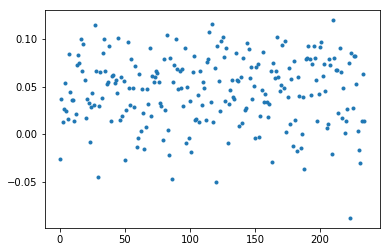

In [107]:
plt.plot(range(len(anomaly_merged)), anomaly_merged['scores_isf'], '.')

In [118]:
# Spectural
X[anomaly_merged['clusters_sp'] == 1].mean() - X[anomaly_merged['clusters_sp'] == 0].mean()

review_count_greater_median          0.166293
AgesAllowed_True                     0.025037
Ambience_classy_full_bar             0.811659
Ambience_classy_none                -0.434978
Ambience_divey_True                 -0.275411
Ambience_hipster_loud                0.117339
Ambience_hipster_quiet              -0.044096
Ambience_hipster_very_loud          -0.004484
Ambience_romantic_dressy             0.157698
Ambience_romantic_formal            -0.004484
Ambience_touristy_True              -0.008969
Ambience_upscale_True                0.268311
BYOB_True                            0.067638
BYOBCorkage_True                     0.301943
BestNights_saturday_True            -0.004484
BestNights_sunday_True              -0.334081
BestNights_tuesday_True             -0.013453
BestNights_wednesday_True            0.083333
BikeParking_True                    -0.013453
BusinessAcceptsCreditCards_True     -0.452915
BusinessParking_garage_True         -0.412556
BusinessParking_lot_free          

In [120]:
X[anomaly_merged['clusters_sp'] == 1]['DietaryRestrictions_halal_True']

dy0O7DaSUd49NZWSEtvz_g    0
7maw_SNG0Q_co6-jPDoUnw    0
b7wUWVV01xaa7E0FUNMDiw    0
yP71_LfUPnGIRqA2g09RoQ    0
1pttL4MkpxOL6Mj2azOjVQ    0
Y3zHWwGWjkdbCPGR7pF6tQ    0
D9bf5U0y_0MnL9wMFc4bKQ    0
B5JCODx4728Ce2Qca1NFHw    0
33IS-0QBNwRC8cXnHABpbg    0
gtcsOodbmk4E0TulYHnlHA    0
u6JJojkbqVlVI4NqKsL54Q    0
_5XClj4E5VCIsEscbrrPKg    0
Name: DietaryRestrictions_halal_True, dtype: uint8

In [121]:
X[anomaly_merged['clusters_sp'] == 0]['DietaryRestrictions_halal_True']

KeQ1cK564cL5C_hBTFrqnA    1
f5xm2RiwLv0gbmXU4BkrGA    0
q0oPX1DXW86QytTvvrD9MA    1
0C6uuZBD7xKS-uucgwoyQw    1
mevOvXMnlTLbSl4w8fcG2A    1
nTQhgQZa7HhIpyM0ICC1mw    1
TBzgzTFSa7pJXiLD7emYaQ    1
0XlbdDkYzC14SZF_bUGeXA    1
o5t33JVLpZWf269AEPB95Q    1
Ih7a0qOMLFnYAec8qyq2Gg    0
WpK-mZ7w-304c78MOEYH6A    1
E_mRnwhHLuz6tgMBScw1mw    1
2BuiyGL0JbNjnc88fYH39Q    1
yPR8Bh55-9NXmooZS7lrLA    1
Q62lGVKqoKJ09lZNt2qpfw    1
IithJLAUG3gWcHw9EKLLFA    1
OXW2erFOPT-Oov6wChxWYA    1
PlJ5Tf9T4QlFQoNZf99aTg    1
MDInVOKvIetk_OIpKd2Ofw    1
mBHYTLynxk-Ryq56QIx6cw    1
QaxDKkqYTtVYZJcqBNTnvQ    1
RlNmDWJ0kkEWXW7yORJZVw    1
sePTDv1dGHPID7kwuNzXaA    1
A6bnXx1see4yZSaVVCVDyw    1
sqHRwTOpFMsdoN_3xsTFNQ    1
aarBX0VyJbjMACGCcMrfEQ    1
cE7ArG7tPXsLSBbgHGHYZA    1
RcEaxi1h3qMIzQTDQyqNFg    1
vuVyosC2e3CQ5GRdr9sh6A    1
8xPmlVJy2o6x0J04CBpEMQ    1
                         ..
e9smQsCHC7-ghr_7fWz4Mw    1
9xPK9u_AGM1sxoG2CU9psA    1
9ad0-8h-DRUheY9dF9rYjQ    1
4egAyQgylMPJgngmNGCloA    1
snw9iNNLpFYZeHotW00u

In [138]:
anomaly_merged['distance_km'].sort_values()

GkY6UWWn0Fz2ehcuBp66pg    1.366998
WKayXylpXcAEReoqgNK3tA    2.689006
1pttL4MkpxOL6Mj2azOjVQ    2.728816
dy0O7DaSUd49NZWSEtvz_g    2.730364
zHNk2BnANwkvHvaXD7yYsg    2.736672
D9bf5U0y_0MnL9wMFc4bKQ    2.749243
ZDDzKXN_JXe7694zePRuTQ    2.782185
bGuxRBRKv7i1BKKfGbjxEw    2.805117
B5JCODx4728Ce2Qca1NFHw    2.919564
E0iHvHraTa-t6ka9rYL8uQ    2.942197
gtcsOodbmk4E0TulYHnlHA    3.131738
KeQ1cK564cL5C_hBTFrqnA         NaN
f5xm2RiwLv0gbmXU4BkrGA         NaN
q0oPX1DXW86QytTvvrD9MA         NaN
0C6uuZBD7xKS-uucgwoyQw         NaN
mevOvXMnlTLbSl4w8fcG2A         NaN
nTQhgQZa7HhIpyM0ICC1mw         NaN
TBzgzTFSa7pJXiLD7emYaQ         NaN
0XlbdDkYzC14SZF_bUGeXA         NaN
o5t33JVLpZWf269AEPB95Q         NaN
Ih7a0qOMLFnYAec8qyq2Gg         NaN
WpK-mZ7w-304c78MOEYH6A         NaN
E_mRnwhHLuz6tgMBScw1mw         NaN
2BuiyGL0JbNjnc88fYH39Q         NaN
yPR8Bh55-9NXmooZS7lrLA         NaN
Q62lGVKqoKJ09lZNt2qpfw         NaN
IithJLAUG3gWcHw9EKLLFA         NaN
OXW2erFOPT-Oov6wChxWYA         NaN
PlJ5Tf9T4QlFQoNZf99a

In [142]:
anomaly_merged.loc['gtcsOodbmk4E0TulYHnlHA', 'categories']

[u'Cafes',
 u'Coffee & Tea',
 u'Nightlife',
 u'Restaurants',
 u'Chinese',
 u'Food',
 u'Bars',
 u'Sandwiches',
 u'Cocktail Bars']

In [139]:
anomaly_merged.loc['gtcsOodbmk4E0TulYHnlHA', :]

categories                        [Cafes, Coffee & Tea, Nightlife, Restaurants, ...
city                                                                        Toronto
hours                             [Monday 12:0-2:0, Tuesday 12:0-2:0, Wednesday ...
is_open                                                                           1
latitude                                                                    43.6627
longitude                                                                  -79.4222
name                                                                      Northwood
neighborhood                                                          Bickford Park
postal_code                                                                 M6G 1M1
review_count                                                                     89
stars                                                                             4
state                                                                       

In [141]:
anomaly_merged['scores_isf'].sort_values()

gtcsOodbmk4E0TulYHnlHA   -0.088266
E0iHvHraTa-t6ka9rYL8uQ   -0.050590
td9FZybutwNG7DgocHCiXA   -0.046976
8xPmlVJy2o6x0J04CBpEMQ   -0.045357
B5JCODx4728Ce2Qca1NFHw   -0.036887
_5XClj4E5VCIsEscbrrPKg   -0.029980
AsPW2a72MNVuV8LTDDNyDQ   -0.029095
WKayXylpXcAEReoqgNK3tA   -0.027684
KeQ1cK564cL5C_hBTFrqnA   -0.026406
zHNk2BnANwkvHvaXD7yYsg   -0.022143
ZDDzKXN_JXe7694zePRuTQ   -0.020572
r3nLLfiW60GX7BPnOsFrjw   -0.018871
Y3zHWwGWjkdbCPGR7pF6tQ   -0.017401
u6JJojkbqVlVI4NqKsL54Q   -0.017084
Qtb4dHWSxOv8RjgBWrzukQ   -0.015257
D9bf5U0y_0MnL9wMFc4bKQ   -0.014430
oOGLDf2rzeCPS7UQ8hhPlQ   -0.013504
1pttL4MkpxOL6Mj2azOjVQ   -0.012733
scVd-lmZCNZHK5W75-4sKQ   -0.009769
bGuxRBRKv7i1BKKfGbjxEw   -0.009119
A6bnXx1see4yZSaVVCVDyw   -0.008277
ZspGe6tJ3d2Y4rxwAG8h-Q   -0.006048
Z0_qLqeFwOQGhBd_aC9s6w   -0.003969
w0ZxXnBGPImeZ9sGMLfe7g   -0.003919
dy0O7DaSUd49NZWSEtvz_g   -0.003836
EA7NU-fwH9VtCCVd3yO1fg   -0.002731
a911y0BuV1rjHXkXlFm3Ig    0.000094
K2CdjES-IZDDEgetOnf0Vw    0.001539
ax4ztJvW28xgGvI0OPqG

In [140]:
anomaly_merged['distance_knn'].sort_values()

85SnEWWFSm8z0EDupfTO7w     4.828427
Rr3ZlPEo70TxT2e_A47y9g     4.828427
JmKgz6n7zn24F-WkgT-kiA     5.000000
tCJjzxEcTWwdqIpIvZEP-g     5.242641
e9smQsCHC7-ghr_7fWz4Mw     5.242641
MTNDAZ5PrnflhmdyKqVJ8w     5.414214
u3q_fVU-qxgoGWLPVy4nMw     5.414214
0v8icS8wOOgEDiHDCOQkZQ     5.732051
RcEaxi1h3qMIzQTDQyqNFg     5.828427
Q62lGVKqoKJ09lZNt2qpfw     5.828427
ALmboc20jElFTgOEvE09vQ     5.828427
OXW2erFOPT-Oov6wChxWYA     6.242641
El6TCImlUAnmDFp3U685eQ     6.242641
fhYtFEVagrSKQu-t2gL66A     6.242641
ZilzayEdyk70SoI-wruJbg     6.242641
KRoJhHyPWORMJn1UO5kAkA     6.242641
l9vx-OTdDPU-oHZ17aVxdg     6.242641
mNRAFxAqL31c2Y96LEKggA     6.242641
ZuZxDPtDsh-nmbLebRC8iA     6.610366
Ki4aSG30_W_2KPjqT50o1w     6.610366
_xt4ZyvtgY8Xu_O6SpSB5A     6.656854
_xpHdMJXFlUhJyTZ8cKYTg     6.656854
GkY6UWWn0Fz2ehcuBp66pg     6.656854
aVFxXttiojZeIW7rmuDSuA     6.656854
h8zFBTYBKSwDFcHuFgwpmQ     6.656854
BHX0ghpo_r4lVxGRPEBIQw     6.656854
rntKF4Dm9JIJoSNi5XqRsQ     6.656854
Nnr0kZIVlW5sWInOJW9LMQ     6